In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
file_path = 'C:\\Users\\PC\\Data Science\\Machine Learning\\Projects\\House Price Prediction\\Dataset\\Housing.csv'
housing_data = pd.read_csv(file_path)

# Analysis

In [5]:
# Exploratory Data Analysis (EDA)
# Display the first few rows
print("First few rows of the dataset:")
housing_data.head()

First few rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# Summary statistics
print("\nSummary statistics:")
housing_data.describe()


Summary statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Check for missing values
print("\nMissing values in each column:")
housing_data.isnull().sum()


Missing values in each column:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# Check data types of each column
print("\nData types of each column:")
housing_data.dtypes


Data types of each column:


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# Visualization

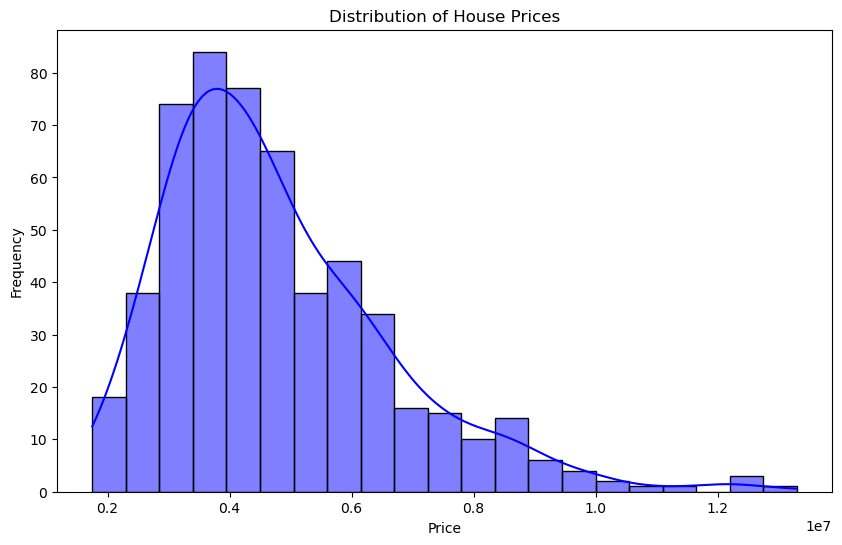

In [10]:
# Visualizing the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

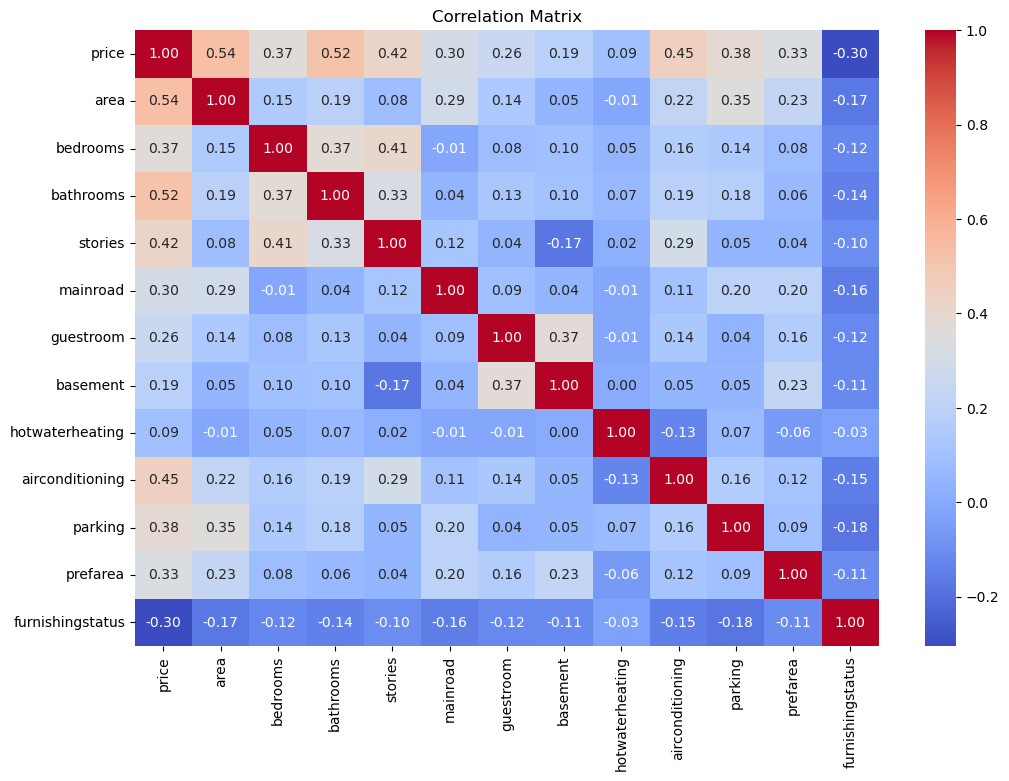

In [11]:
# Encode categorical variables before calculating the correlation matrix
label_encoders = {}
for column in housing_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    housing_data[column] = le.fit_transform(housing_data[column])
    label_encoders[column] = le

# Now, you can calculate and visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


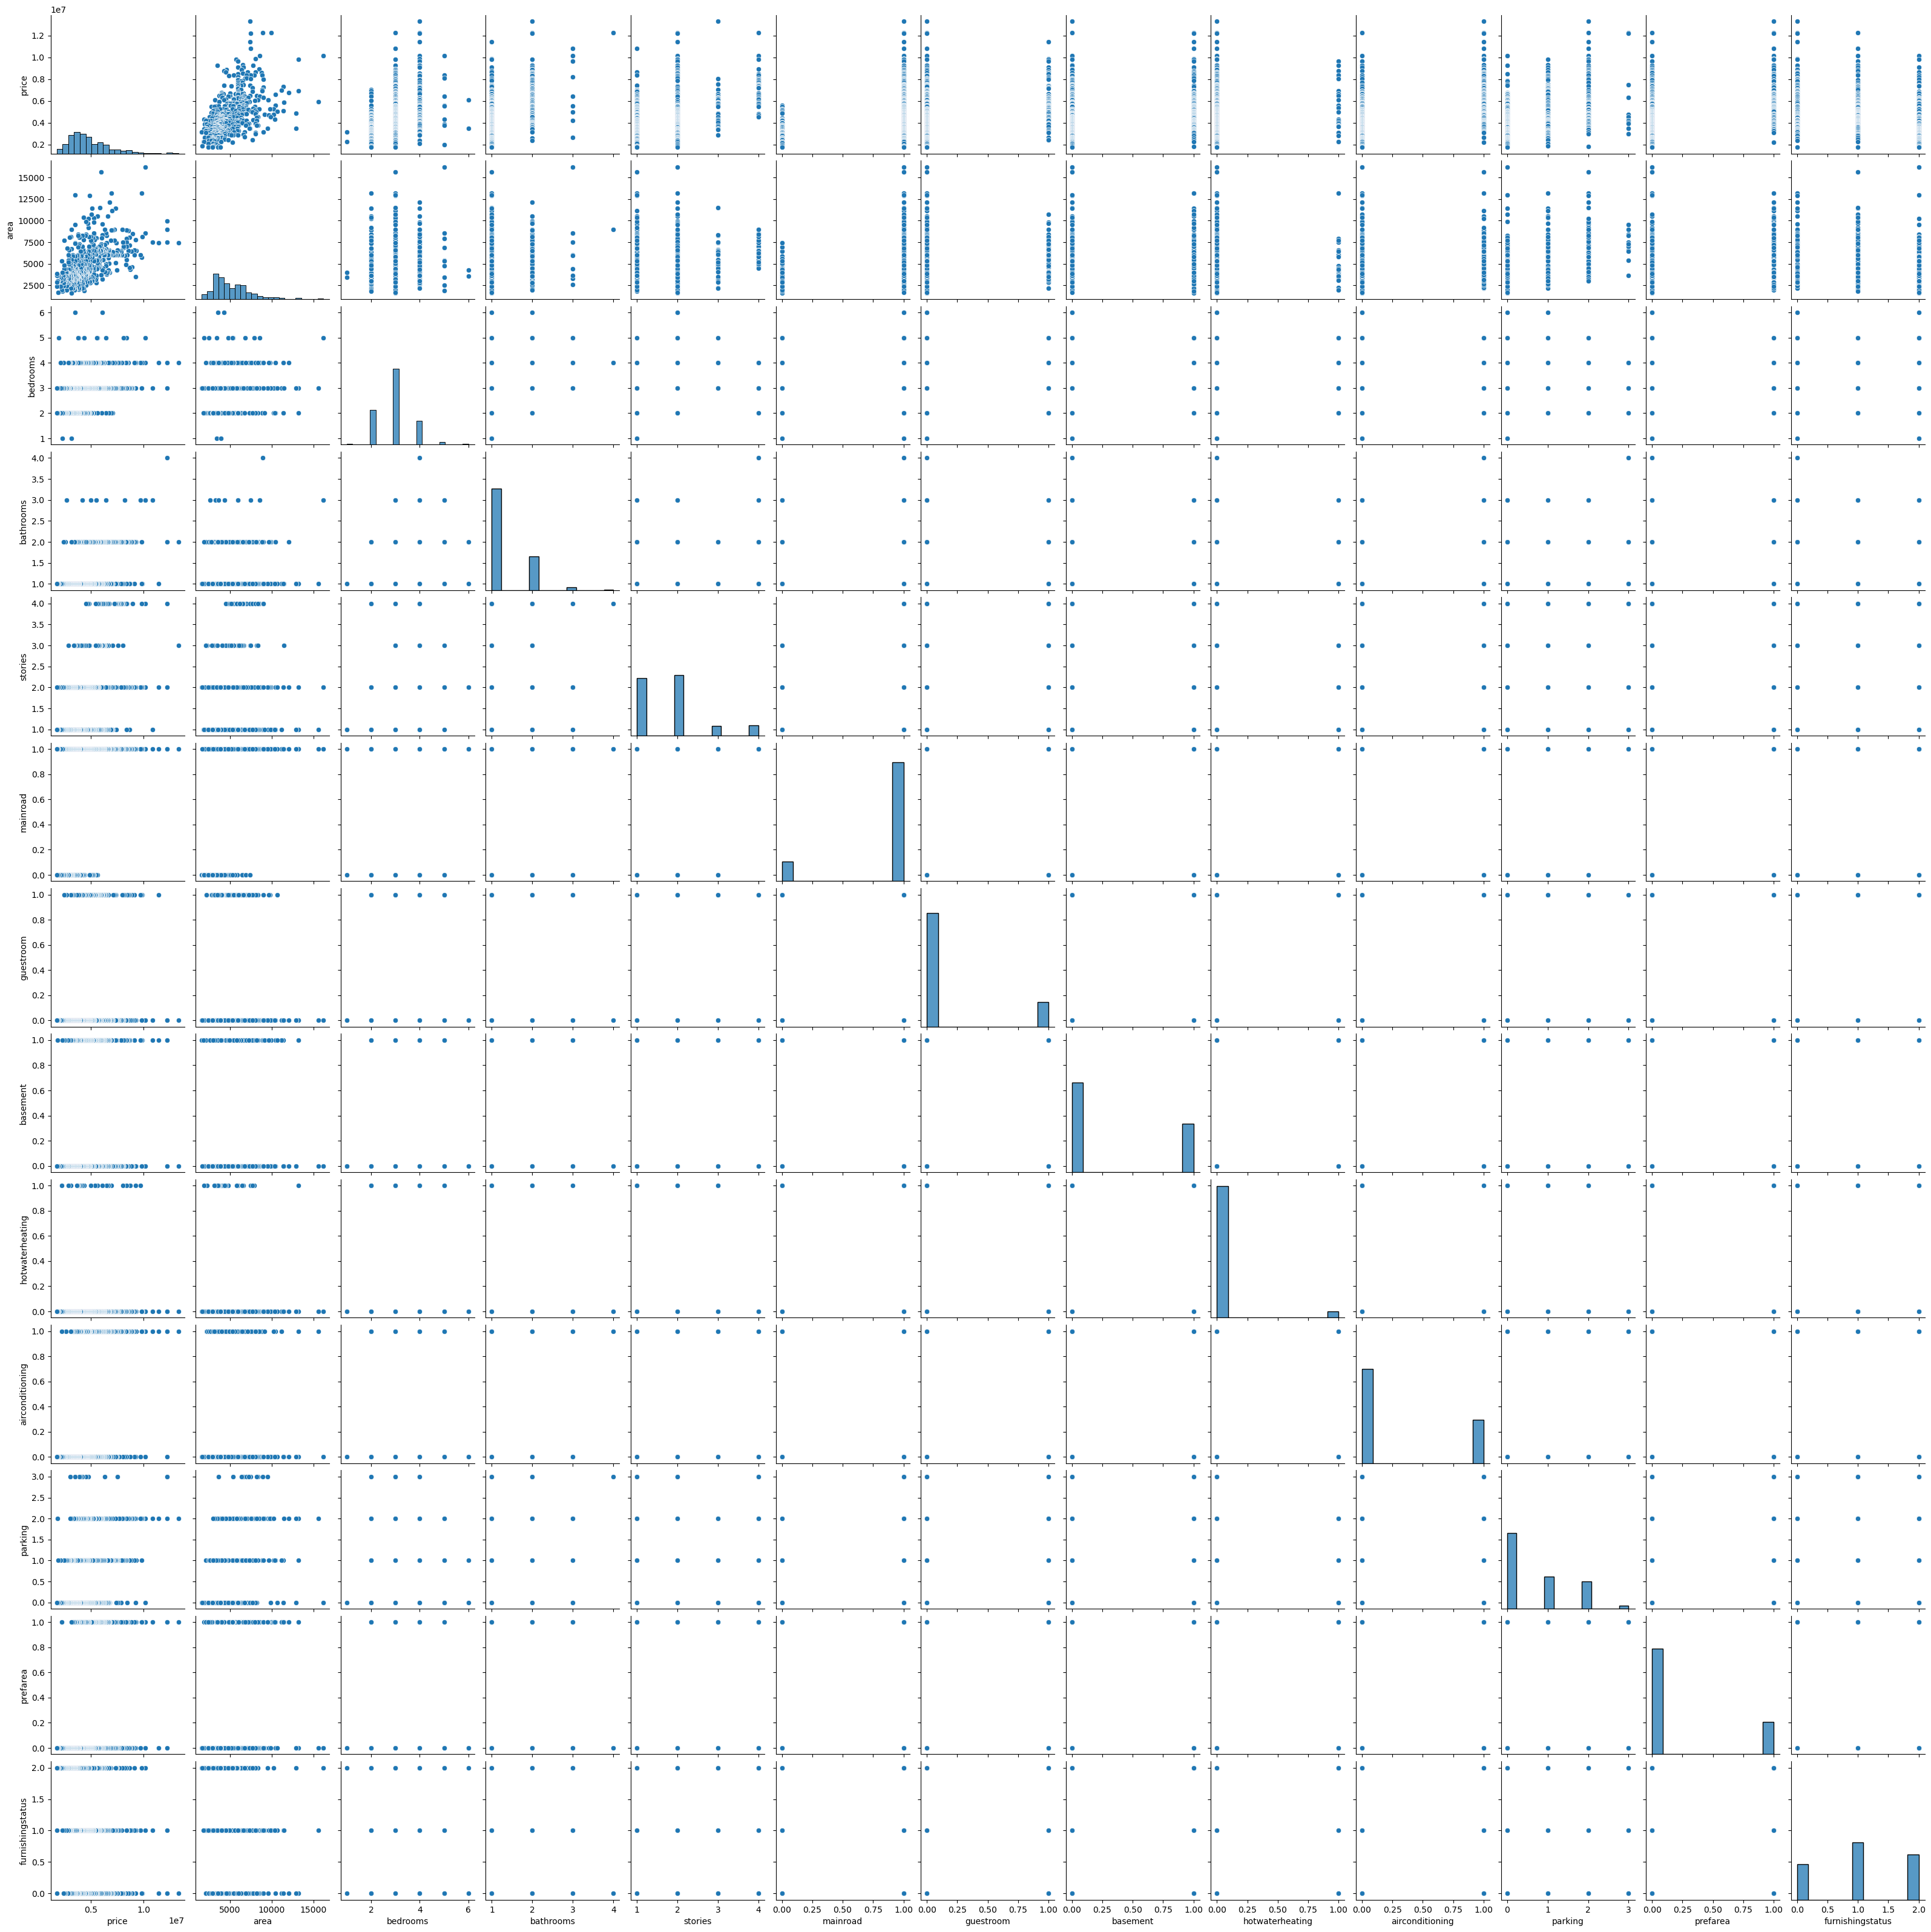

In [12]:
# Advanced Visualization
# Pairplot to visualize relationships between numerical features
sns.pairplot(housing_data)
plt.show()

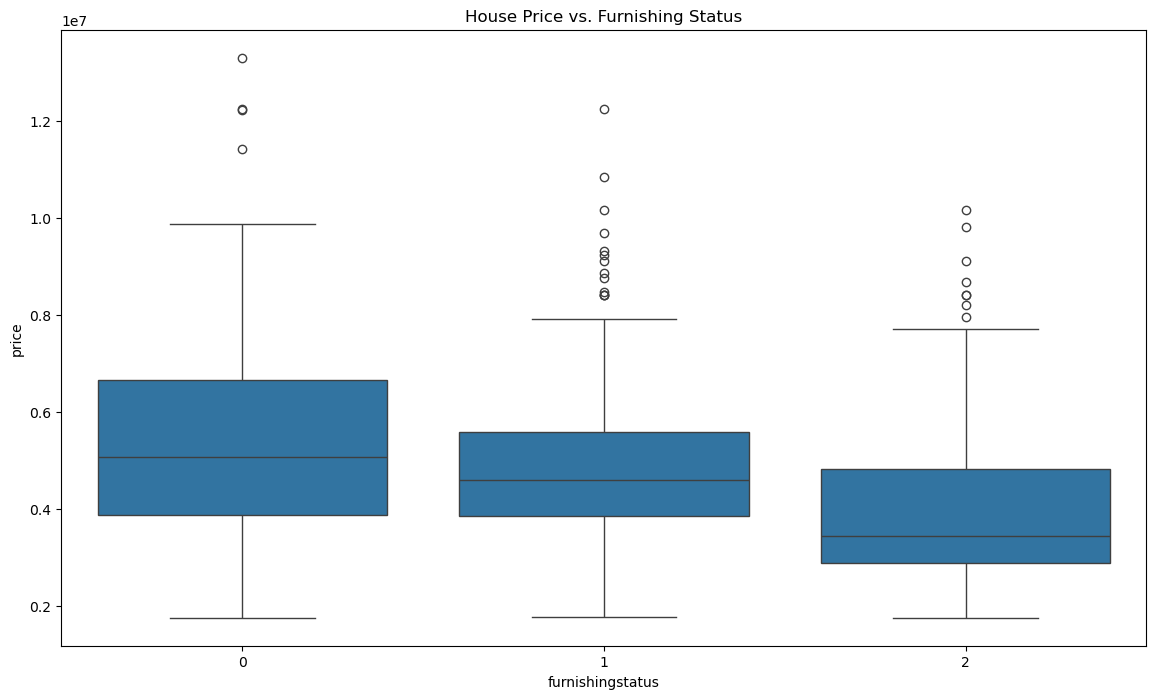

In [13]:
# Boxplots to visualize categorical features against the target variable (price)
plt.figure(figsize=(14, 8))
sns.boxplot(x='furnishingstatus', y='price', data=housing_data)
plt.title('House Price vs. Furnishing Status')
plt.show()

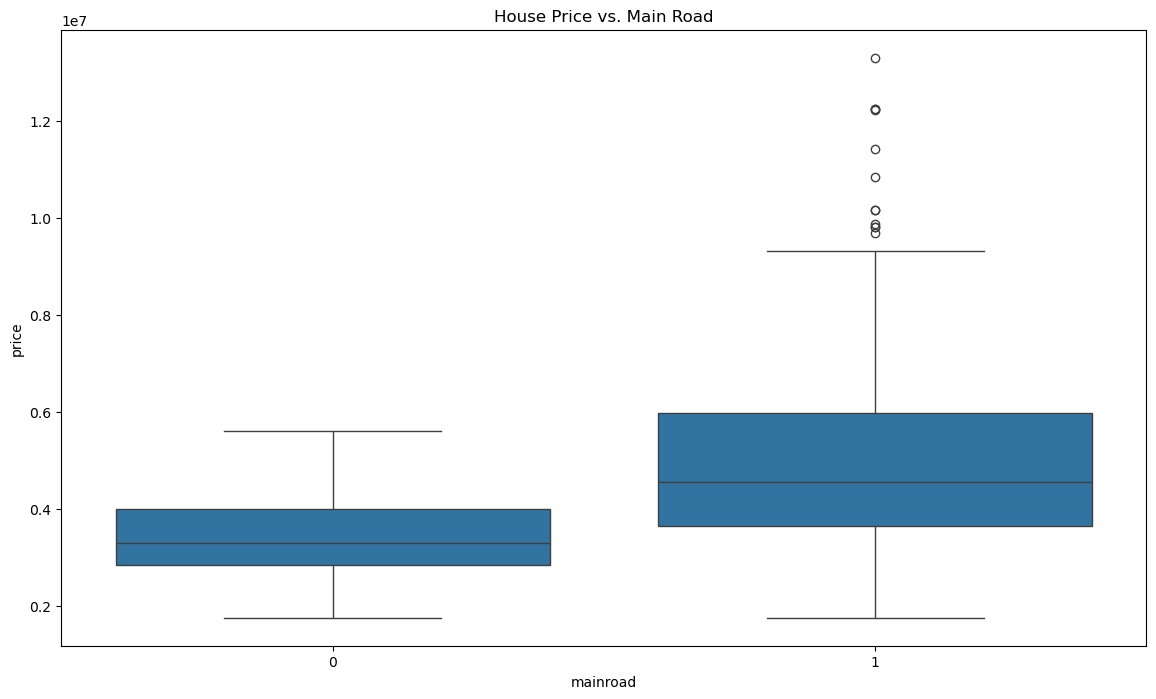

In [14]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='mainroad', y='price', data=housing_data)
plt.title('House Price vs. Main Road')
plt.show()

# Feature Engineering

In [16]:
# Encode categorical variables
label_encoders = {}
for column in housing_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    housing_data[column] = le.fit_transform(housing_data[column])
    label_encoders[column] = le

In [17]:
# Define the features (X) and target variable (y)
X = housing_data.drop('price', axis=1)
y = housing_data['price']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [20]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Testing

In [22]:
# Using Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Predicting on the test set
y_pred = rf_model.predict(X_test)

In [24]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [25]:
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")


Model Evaluation:
Mean Squared Error (MSE): 1962144940711.022
Root Mean Squared Error (RMSE): 1400765.8407853262
R-squared (R2 Score): 0.6118077610803518


In [26]:
# Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted values:")
print(comparison_df.head(10))  # Display the first 10 predictions


Comparison of Actual vs Predicted values:
      Actual   Predicted
316  4060000  5223575.00
77   6650000  7425040.00
360  3710000  3776158.75
90   6440000  4526620.00
493  2800000  3733800.00
209  4900000  3488380.00
176  5250000  5106360.00
249  4543000  5199390.00
516  2450000  2561930.00
426  3353000  2878067.50


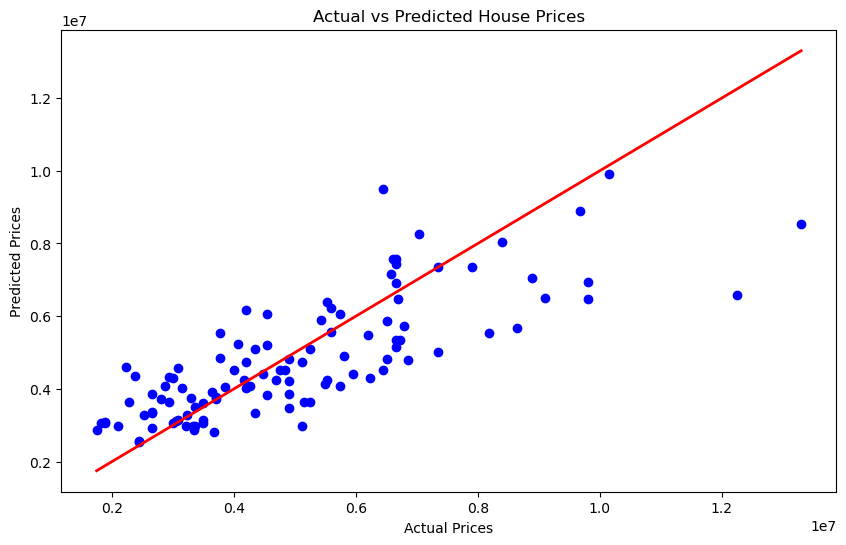

In [27]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# User Input Based Predictor Function

In [29]:
from sklearn.preprocessing import LabelEncoder

# Fit the label encoders
label_encoders = {
    'mainroad': LabelEncoder().fit(['yes', 'no']),
    'guestroom': LabelEncoder().fit(['yes', 'no']),
    'basement': LabelEncoder().fit(['yes', 'no']),
    'hotwaterheating': LabelEncoder().fit(['yes', 'no']),
    'airconditioning': LabelEncoder().fit(['yes', 'no']),
    'prefarea': LabelEncoder().fit(['yes', 'no']),
    'furnishingstatus': LabelEncoder().fit(['furnished', 'semi-furnished', 'unfurnished'])
}

# Check if the label encoders are created
print("Label encoders available for each categorical column:")
print(label_encoders)

Label encoders available for each categorical column:
{'mainroad': LabelEncoder(), 'guestroom': LabelEncoder(), 'basement': LabelEncoder(), 'hotwaterheating': LabelEncoder(), 'airconditioning': LabelEncoder(), 'prefarea': LabelEncoder(), 'furnishingstatus': LabelEncoder()}


In [30]:
def predict_house_price(model, scaler, label_encoders):
    # User inputs
    area = float(input("Enter the area (in square feet): "))
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = int(input("Enter the number of bathrooms: "))
    stories = int(input("Enter the number of stories: "))
    mainroad = input("Is the house on the main road? (yes/no): ")
    guestroom = input("Does the house have a guest room? (yes/no): ")
    basement = input("Does the house have a basement? (yes/no): ")
    hotwaterheating = input("Does the house have hot water heating? (yes/no): ")
    airconditioning = input("Does the house have air conditioning? (yes/no): ")
    parking = int(input("Enter the number of parking spaces: "))
    prefarea = input("Is the house in a preferred area? (yes/no): ")
    furnishingstatus = input("Enter the furnishing status (furnished/semi-furnished/unfurnished): ")

    # Encoding user input
    user_data = {
        'area': area,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'stories': stories,
        'mainroad': label_encoders['mainroad'].transform([mainroad])[0],
        'guestroom': label_encoders['guestroom'].transform([guestroom])[0],
        'basement': label_encoders['basement'].transform([basement])[0],
        'hotwaterheating': label_encoders['hotwaterheating'].transform([hotwaterheating])[0],
        'airconditioning': label_encoders['airconditioning'].transform([airconditioning])[0],
        'parking': parking,
        'prefarea': label_encoders['prefarea'].transform([prefarea])[0],
        'furnishingstatus': label_encoders['furnishingstatus'].transform([furnishingstatus])[0]
    }

    user_df = pd.DataFrame([user_data])

    # Scaling the input data
    user_df_scaled = scaler.transform(user_df)

    # Predicting the price
    predicted_price = model.predict(user_df_scaled)

    print(f"\nThe predicted house price is: {predicted_price[0]:.2f}")



In [31]:
# Call the prediction function
predict_house_price(rf_model, scaler, label_encoders)

Enter the area (in square feet):  1600
Enter the number of bedrooms:  4
Enter the number of bathrooms:  2
Enter the number of stories:  4
Is the house on the main road? (yes/no):  yes
Does the house have a guest room? (yes/no):  yes
Does the house have a basement? (yes/no):  no
Does the house have hot water heating? (yes/no):  yes
Does the house have air conditioning? (yes/no):  yes
Enter the number of parking spaces:  2
Is the house in a preferred area? (yes/no):  yes
Enter the furnishing status (furnished/semi-furnished/unfurnished):  furnished



The predicted house price is: 6349595.00


In [32]:
import pickle

# Assuming `model` is your trained model
filename = 'House_Price_Prediction_Model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)